## Imports


In [5]:
import pandas as pd
import pyarrow
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Functions


In [ ]:
#fonction de Joseph Allyndrée provenant de "plotting copy.ipnyb"
def load_parquet_or_csv (path_ : str, verbose : bool = False) -> pd.DataFrame :
    """
    Load the parquet or csv file and return the dataframe.

    Args:
        path (str): the path to the parquet or csv file
    Returns:
        pd.DataFrame: the dataframe loaded
    """
    try :
        os.path.exists(path_)
    except FileNotFoundError :
        raise ValueError (f"The file {path_} doesn't exist")
    
    if path_.endswith(".parquet"):
        df = pd.read_parquet(path_, engine='pyarrow') # pyarrow backend for multicore loading
    elif path_.endswith(".csv"):
        df = pd.read_csv(path_) # no need for pyarrow as csvs are lightweight in our experiment
    else :
        raise ValueError (f"The file {path_} is not a parquet or csv file")

    if verbose :
        print(f"The file {path_.split(os.sep)[-1]} has been loaded successfully")
    return df       

def lissage_signal(path_ : str, smooth_time : str = 20, smooth_function = pd.mean()) -> pd.DataFrame:
    """
    Smooth time series signal according to "smooth_time" parameter chosen

    ** Args : 
        path (str) : the path to the parquet file
        smooth_time (str) : Time step chosen to smooth time series
    ** Returns:
        pd.DataFrame : the dataframe smoothed

    ** Additional information : About "smooth_time" argument :
    - Seconds = "s" Ex : 1 second --> 1s
    - Minutes = "min"
    - Hours = "h"
    - Days = "d"
    - Months = "m"

    """
    #Load file
    file = load_parquet_or_csv(path_)
    #put "relative_DateTime" as an index
    file.set_index('relative_DateTime', inplace = True)
    #sort by "ble_id" & "relative_DateTime" attributes --> pas nécessaire je crois
    #sort_file = file.sort_values(["ble_id", "relative_DateTime"])
    #function pandas "resample()" aims to smooth a time series data
    smoothed_file = file\
            .groupby('ble_id')\
            .resample(smooth_time)
    
    smoothed_file = smooth_function(smoothed_file)

    smoothed_file.drop(columns = "ble_id", inplace = True)
    
    return smoothed_file

In [8]:
path = "D:/Cours APT/Projet Fil Rouge/Donnees_brutes_PFR-TRACE/PFR INRAE - Graphes reseaux/RSSI_relative_DT/"
file_name = "20240319-20240410_366a_reltime_ble.parquet"
#file = pd.read_parquet(path + "20240319-20240410_366a_reltime_ble.parquet", engine="pyarrow")
file = load_parquet_or_csv(path+file_name)

In [57]:
file

,ble_id,RSSI,tick_accel,relative_DateTime
0,96,-60,3.750000e-01,2024-03-19 08:53:45.750000
1,93,-74,8.125000e-01,2024-03-19 08:53:46.187500
2,94,-57,8.750000e-01,2024-03-19 08:53:46.250000
3,95,-52,1.187500e+00,2024-03-19 08:53:46.562500
4,107,-59,1.375000e+00,2024-03-19 08:53:46.750000
...,...,...,...,...
152641,99,-58,1.925119e+06,2024-04-10 15:39:03.937500
152642,107,-61,1.925119e+06,2024-04-10 15:39:04.250000
152643,109,-71,1.925119e+06,2024-04-10 15:39:04.437500
152644,101,-67,1.925119e+06,2024-04-10 15:39:04.437500


In [ ]:
#argument inplace permet d'appliquer la fonction directement sur "file" sans nécessité d'affectation
file.set_index('relative_DateTime', inplace=True)

In [59]:
file

,ble_id,RSSI,tick_accel
relative_DateTime,,,
2024-03-19 08:53:45.750000,96,-60,3.750000e-01
2024-03-19 08:53:46.187500,93,-74,8.125000e-01
2024-03-19 08:53:46.250000,94,-57,8.750000e-01
2024-03-19 08:53:46.562500,95,-52,1.187500e+00
2024-03-19 08:53:46.750000,107,-59,1.375000e+00
...,...,...,...
2024-04-10 15:39:03.937500,99,-58,1.925119e+06
2024-04-10 15:39:04.250000,107,-61,1.925119e+06
2024-04-10 15:39:04.437500,109,-71,1.925119e+06


In [13]:
file_sort = file.sort_values(["ble_id", "relative_DateTime"])

In [12]:
file_sort

NameError: name 'file_sort' is not defined

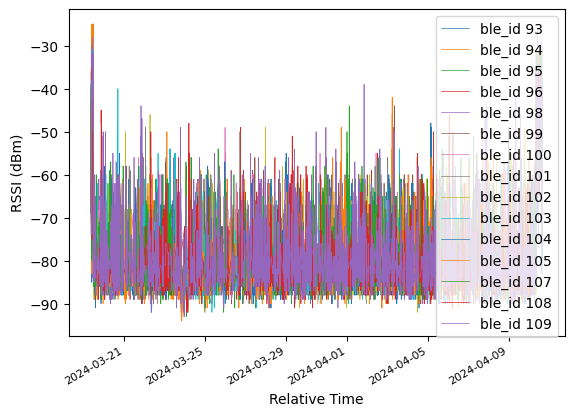

In [87]:
fig, ax1 = plt.subplots()

for ble_id, group in file_sort.groupby('ble_id'):
    # Tracer chaque groupe avec une couleur différente
    group['RSSI'].plot(label=f'ble_id {ble_id}', linewidth=0.5)

#ax1.plot(file_sort["RSSI"], label=file_sort["ble_id"].unique(), linewidth=0.5)
plt.xticks(rotation=30, fontsize=8)
ax1.set_xlabel("Relative Time", fontsize=10)
ax1.set_ylabel("RSSI (dBm)", fontsize=10)
#ax1.set_title(f"RSSI data for accelerometer {3664}", fontsize=20)
ax1.legend(loc='upper right')
plt.show()


In [88]:
# plt.plot(file_sort_93["RSSI"])
# plt.xticks(rotation=30, fontsize=8)
# plt.show()

In [67]:
file_sort_lissage = file_sort.groupby('ble_id').resample('20s').mean()

In [92]:
file_sort_lissage.drop(columns = "ble_id", inplace = True)

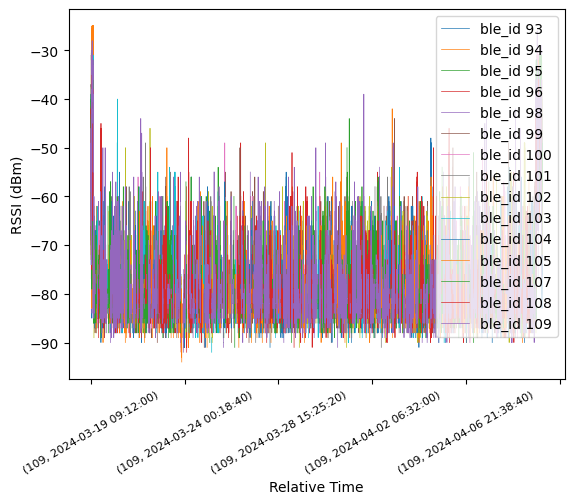

In [93]:
fig, ax1 = plt.subplots()

for ble_id, group in file_sort_lissage.groupby('ble_id'):
    # Tracer chaque groupe avec une couleur différente
    group['RSSI'].plot(label=f'ble_id {ble_id}', linewidth=0.5)

#ax1.plot(file_sort["RSSI"], label=file_sort["ble_id"].unique(), linewidth=0.5)
plt.xticks(rotation=30, fontsize=8)
ax1.set_xlabel("Relative Time", fontsize=10)
ax1.set_ylabel("RSSI (dBm)", fontsize=10)
#ax1.set_title(f"RSSI data for accelerometer {3664}", fontsize=20)
ax1.legend(loc='upper right')
plt.show()

In [10]:
rssi_30s = lissage_signal(
    path_ = path+file_name,
    smooth_time = "20s")

In [11]:
rssi_30s

RSSI    tick_accel
ble_id relative_DateTime                      
93     2024-03-19 08:53:40 -74.0  8.125000e-01
       2024-03-19 08:54:00 -62.0  1.837500e+01
       2024-03-19 08:54:20 -61.0  3.793750e+01
       2024-03-19 08:54:40 -54.0  5.906250e+01
       2024-03-19 08:55:00 -51.0  7.862500e+01
...                          ...           ...
109    2024-04-10 15:37:40 -60.0  1.925039e+06
       2024-04-10 15:38:00 -64.0  1.925059e+06
       2024-04-10 15:38:20 -61.0  1.925080e+06
       2024-04-10 15:38:40 -61.0  1.925100e+06
       2024-04-10 15:39:00 -71.0  1.925119e+06

[1313622 rows x 2 columns]

In [ ]:
from TRACE_module.preprocessing import 